# Î∂ÑÏÑù Î™©Ìëú: ÏÉùÏ°¥Î•†Ïóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî ÏòÅÌñ•Ïù∏Ïûê ÎèÑÏ∂ú
# Í∞ÄÏÑ§ ÏÑ§Ï†ï
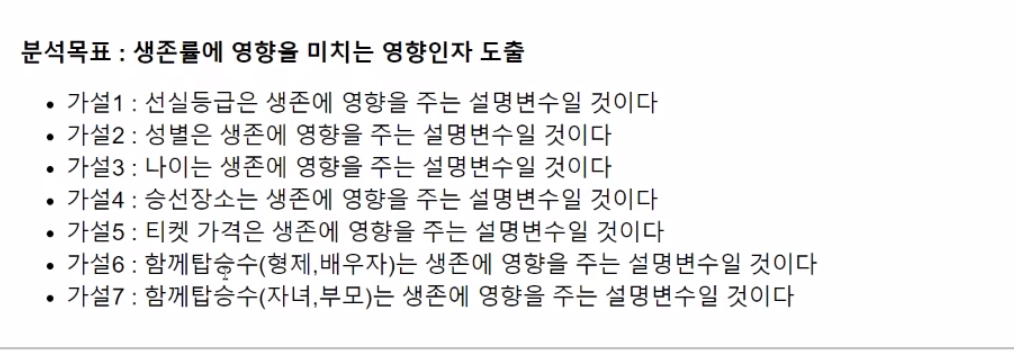
# Í≤∞Ï∏°Ïπò ÌôïÏù∏: isnull.count
# Î≤îÏ£ºÌòï Î≥ÄÏàò: ÎπÑÏú® ÌôïÏù∏ 
ÎÇ®ÏÑ±Ïù¥ Î™á % ÎßéÎã§.
# EDAÎ•º ÌÜµÌïú ÏÉùÏ°¥Ïóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî Ïû†Ïû¨Ïù∏Ïûê ÎèÑÏ∂ú
üìåEDAÎ•º ÌÜµÌï¥ Îç∞Ïù¥ÌÑ∞Î•º Ïù¥Ìï¥ÌïòÍ≥†, Í∞ÄÏÑ§Ïùò Í∞ÄÎä•ÏÑ±ÏùÑ ÌôïÏù∏Ìï¥Î≥¥Í≥†, Î∂ÑÏÑù Î∞©Ìñ•ÏùÑ ÏÑ§Ï†ïÌïòÎ©∞ Î™®Îì† Í≤ÉÏù¥ Í≤∞Ï†ïÎêúÎã§.
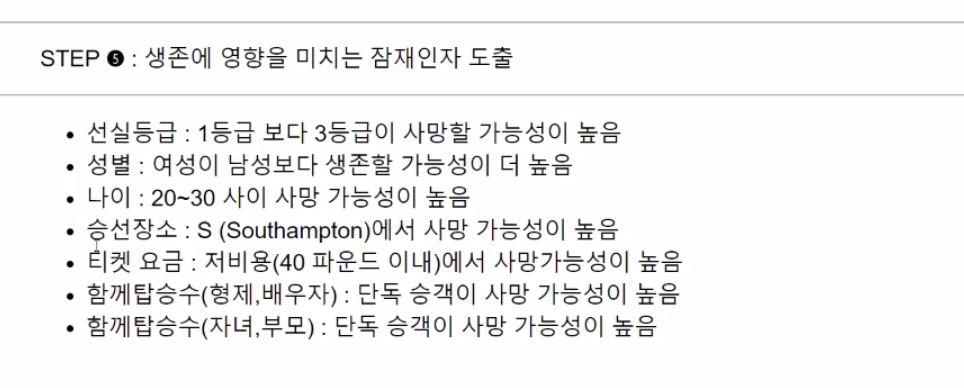

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats
from scipy import stats
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind
from scipy.stats import shapiro
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu

from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.stattools import omni_normtest

from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.api import qqplot, add_constant

from sklearn.preprocessing import scale, minmax_scale, robust_scale

%matplotlib inline
sns.set(font="AppleGothic")
plt.rcParams['axes.unicode_minus']=False

# 1. Îç∞Ïù¥ÌÑ∞ ÏÜçÏÑ± Î∞è Í∏∞Ïà†ÌÜµÍ≥ÑÎüâ ÌôïÏù∏ 

In [10]:
df = pd.read_csv('titanic.csv', engine='python', encoding='cp949')
df.head(n=3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

# 1-1. Îç∞Ïù¥ÌÑ∞ ÏÜçÏÑ±: Î≤îÏ£ºÌòï Î≥ÄÏàòÏôÄ Ïó∞ÏÜçÌòï Î≥ÄÏàò ÌôïÏù∏
Name, Sex, TicketÏùÄ Î≤îÏ£ºÌòï Î≥ÄÏàòÏù¥Îã§.
Ï∂îÍ∞ÄÏ†ÅÏúºÎ°ú Pclass, SibSp, Parch, SurviedÎäî Ïã§ÏàòÌòïÏù¥ÏßÄÎßå Î≤îÏ£ºÌòï Î≥ÄÏàòÏù¥Îã§.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 1-2. Í∏∞Ïà†ÌÜµÍ≥ÑÎüâ
ÏäπÍ∞ù ÎÇòÏù¥ ÌèâÍ∑†ÏùÄ ÏïΩ 30ÏÑ∏Ïù¥Îã§.

ÏöîÍ∏à ÌèâÍ∑†ÏùÄ 32ÌååÏö¥ÎìúÏù¥Îã§.

In [3]:
df.drop('PassengerId', axis=1).describe()

Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.758889    0.523008    0.381594   32.204208
std      0.486592    0.836071   13.002570    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   30.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

# 2. Î™©ÌëúÎ≥ÄÏàò Î∞è ÏÑ§Î™ÖÎ≥ÄÏàò(Î≤îÏ£ºÌòï/Ïó∞ÏÜçÌòï)Ïùò Î∂ÑÌè¨ ÌôïÏù∏

# 2-1. Î≤îÏ£ºÌòï Î≥ÄÏàòÎì§

# ÏÑ§Î™ÖÎ≥ÄÏàò1: Ï¢åÏÑù Îì±Í∏âÏùò count
3Îì±Í∏â Ï¢åÏÑùÏù¥ Í∞ÄÏû• ÎßéÍ≥† ÏàúÏÑúÎäî 3Îì±Í∏â>1Îì±Í∏â>2Îì±Í∏âÏù¥Îã§.

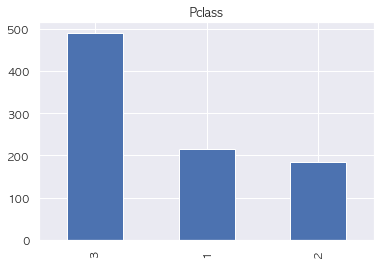

In [28]:
df_cnt= df['Pclass'].value_counts()
df_cnt.plot.bar()
plt.title('Pclass')
plt.show()
plt.close()

<AxesSubplot:xlabel='Pclass', ylabel='count'>

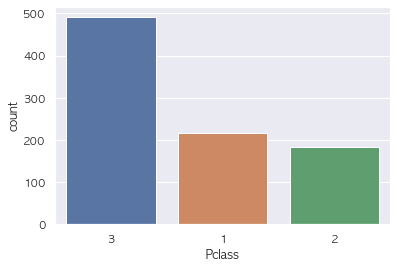

In [16]:
sns.countplot(x='Pclass', data=df, order=df['Pclass'].value_counts().index)

# ÏÑ§Î™ÖÎ≥ÄÏàò2: ÏÑ±Î≥Ñ count

ÎÇ®ÏÑ±Ïù¥ Ïó¨ÏÑ±Î≥¥Îã§ 2Î∞∞ ÎßéÎã§

<AxesSubplot:xlabel='Sex', ylabel='count'>

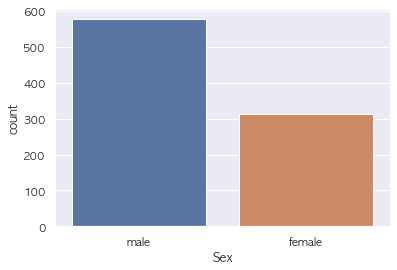

In [7]:
sns.countplot(x='Sex', data=df, order=df['Sex'].value_counts().index)

# ÏÑ±Î≥Ñ Î≥ÄÏàò ÌûàÏä§ÌÜ†Í∑∏Îû® Í≤πÏ≤ò Í∑∏Î¶¨Ïñ¥ Ìï¥ÏÑùÌïòÍ∏∞.
Îëê ÏÑ±Î≥ÑÏùò Î∂ÑÌè¨Î•º ÎπÑÍµêÌïòÍ∏∞ ÏúÑÌï¥ÏÑú ÌûàÏä§ÌÜ†Í∑∏Îû®Ïùò Î≤îÏúÑÎ•º ÎèôÏùºÌïòÍ≤å ÏÑ§Ï†ïÌïòÍ≥† Í≤πÏ≥ê Í∑∏Î¶¨Îäî Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©ÌñàÎã§.

Í≤∞Í≥º: 

Îëê ÏÑ±Î≥Ñ Î™®Îëê 30ÏùÑ ÌèâÍ∑†ÏúºÎ°ú Í∞ÄÏßÄÎäî Î∂ÑÌè¨Î•º Í∞ÄÏßÄÎ©∞, ÎÇòÏù¥Î≤îÏúÑÏóê Îî∞Î•∏ ÏäπÍ∞ù Î∂ÑÌè¨Í∞Ä ÎπÑÏä∑Ìï®ÏùÑ Ïïå Ïàò ÏûàÎã§.

ÎÇ®, ÎÖÄ Î™®Îëê 20ÎåÄ Ïù¥ÏÉÅÏù¥ ÎåÄÎã§ÏàòÎ•º Ï∞®ÏßÄÌïúÎã§.

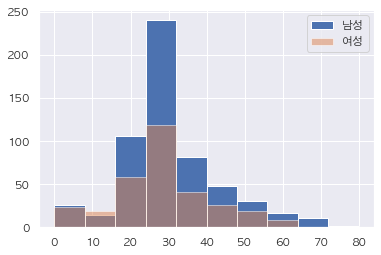

In [15]:
plt.hist(df[df['Sex']=='male']['Age'], label='ÎÇ®ÏÑ±', alpha=1, range=(0,80))
plt.hist(df[df['Sex']=='female']['Age'], label='Ïó¨ÏÑ±', alpha=0.5, range=(0,80))
plt.legend()
plt.ylabel('Count')
plt.xlabel('Sex')
plt.show()

# ÏÑ§Î™ÖÎ≥ÄÏàò 3, 4: SibSp, Parch

Ìï®Íªò ÌÉëÏäπÌïú ÌòïÏ†ú, Î∞∞Ïö∞Ïûê, ÏûêÎÖÄ, Î∂ÄÎ™®Ïùò ÏàòÎäî ÎåÄÎ∂ÄÎ∂Ñ 0Î™ÖÏù¥Îã§.

=>Îî∞ÎùºÏÑú ÏïÑÎßàÎèÑ Ï¢ÖÏÜç Î≥ÄÏàòÏóê ÎåÄÌïú ÏÑ§Î™ÖÎ†•Ïù¥ Ï†ÅÏùÑ Í≤ÉÏúºÎ°ú ÏòàÏÉÅÎêúÎã§.

Î∂ÑÌè¨Îäî skewed Î∂ÑÌè¨Î•º ÎùÑÍ≥† ÏûàÎã§.

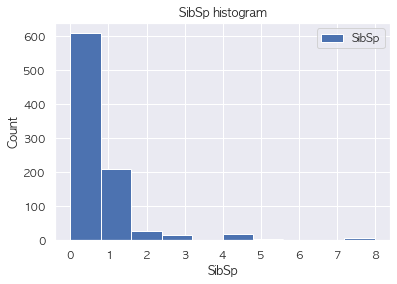

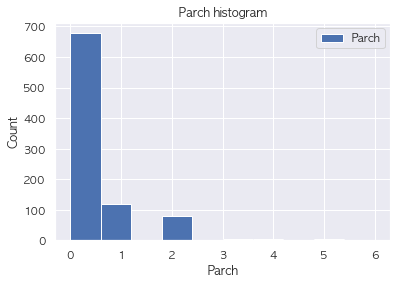

In [70]:
labels=['SibSp','Parch']
for label in labels:
#     sns.countplot(x=label, data=df, order=df[label].value_counts().index)
#     plt.show()
#     plt.close()
    plt.hist(df[label], label=label, alpha=1)#, range=(0,80))
    plt.legend()
    plt.title(label+' histogram')
    plt.ylabel('Count')
    plt.xlabel(label)
    plt.show()
    plt.close()

# 2-2. Ïó∞ÏÜçÌòï Î≥ÄÏàòÎì§

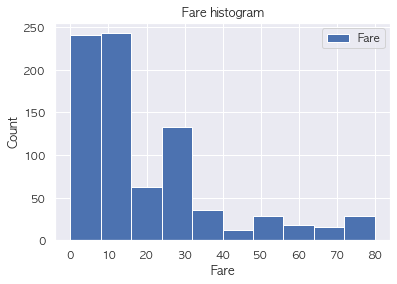

In [4]:
labels=['Fare']
for label in labels:

    plt.hist(df[label], label=label, range=(0,80))
    plt.legend()
    plt.title(label+' histogram')
    plt.ylabel('Count')
    plt.xlabel(label)
    plt.show()
    plt.close()

# 3. Î≥ÄÏàòÎì§Ïùò Í≤∞Ï∏° Î∞è Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨
- Cabin(Í∞ùÏã§ Î≤àÌò∏)Ïóê 600Í∞ú Ïù¥ÏÉÅÏùò Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎã§.
- Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ Î∞©Î≤ï Í≥†Ïïà: 
    - Îç∞Ïù¥ÌÑ∞Ïùò ÎåÄÎã§Ïàò(77.1%)Í∞Ä Í≤∞Ï∏°ÎêòÏñ¥ÏûàÏúºÎØÄÎ°ú Cabin Î≥ÄÏàòÍ∞Ä Ï¢ÖÏÜç Î≥ÄÏàòÏóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÏπò ÏïäÎäîÎã§Í≥† Í∞ÄÏ†ïÌïòÍ≥† Î∂ÑÏÑùÏóêÏÑú Ï†úÏô∏ÌïòÎäî Í≤ÉÏúºÎ°ú Í≤∞Ï†ïÌïòÏòÄÎã§.

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
 9   Agegroup     891 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 69.7+ KB


# 4. Î≥ÄÏàòÍ∞Ñ Í¥ÄÍ≥Ñ ÌôïÏù∏
### Ï¢ÖÏÜç Î≥ÄÏàòÍ∞Ä Ïù¥ÏÇ∞ÌòïÏù¥ÎØÄÎ°ú Î≥ÄÏàòÍ∞Ñ ÏÉÅÍ¥Ä Í¥ÄÍ≥Ñ ÌôïÏù∏ÏùÑ ÏúÑÌï¥ Ïó∞ÏÜçÌòï Î≥ÄÏàòÎ°ú ÌååÏÉù Î≥ÄÏàòÎ•º ÎßåÎì§ÏóàÏäµÎãàÎã§

# 4-0. ÌååÏÉù Î≥ÄÏàò ÏÉùÏÑ±1: ÎÇòÏù¥Í∑∏Î£π
ÎÇòÏù¥ÎåÄÏóê Îî∞Î•∏ ÏòÅÌñ•Î†•ÏùÑ Ìï¥ÏÑùÌïòÍ∏∞ ÏúÑÌï¥, age_categorizeÌï®ÏàòÎ•º Ï†ïÏùòÌïòÍ≥† AgeÎ≥ÄÏàòÏóê Ï†ÅÏö©ÌïòÏó¨ AgegroupÎ≥ÄÏàòÎ•º ÏÉàÎ°≠Í≤å ÎßåÎì§ÏóàÏäµÎãàÎã§.

In [12]:
# Ïà´ÏûêÌòï Îç∞Ïù¥ÌÑ∞Î•º Î≤îÏ£ºÌòïÏúºÎ°ú Î≥ÄÌôò
import math
def age_categorize(age):
    if math.isnan(age):
        return -1
    return math.floor(age/10)*10  

df['Agegroup']=df['Age'].apply(age_categorize)

# 4-1. ÌååÏÉù Î≥ÄÏàò ÏÉùÏÑ±2: ÏÉùÏ°¥Î•†
survived Î≥ÄÏàòÏóêÏÑú ÏÉùÏ°¥ÏùÄ 1Ïù¥Í≥† ÏÉùÏ°¥ÌïòÏßÄ Î™ªÌïú Í≤ÉÏùÄ 0ÏúºÎ°ú ÌëúÏãúÎêòÎØÄÎ°ú,

ÏÉùÏ°¥Î•†ÏùÄ Îã§ÏùåÍ≥º Í∞ôÏù¥ Ï†ïÏùòÎêúÎã§.

**Í∑∏Î£πÎ≥Ñ ÏÉùÏ°¥Î•† = Í∑∏Î£π ÎÇ¥Î∂Ä survived Î≥ÄÏàòÏùò Ï¥ù Ìï©/ Í∑∏Î£π ÎÇ¥Î∂Ä survived Î≥ÄÏàòÏùò Ï¥ù Í∞úÏàò**


In [14]:
# Í∑∏Î£πÌôî
class_group = df.groupby('Pclass') # Pclass Í∏∞Ï§ÄÏúºÎ°ú Í∑∏Î£πÌôî
gender_group = df.groupby('Sex') # Sex Í∏∞Ï§ÄÏúºÎ°ú Í∑∏Î£πÌôî
age_group = df.groupby('Agegroup') # Agegroup Í∏∞Ï§ÄÏúºÎ°ú Í∑∏Î£πÌôî
SibSp_group = df.groupby('SibSp') # SibSp Í∏∞Ï§ÄÏúºÎ°ú Í∑∏Î£πÌôî
Parch_group = df.groupby('Parch') # Parch Í∏∞Ï§ÄÏúºÎ°ú Í∑∏Î£πÌôî
Fare_group = df.groupby('Fare') # Fare Í∏∞Ï§ÄÏúºÎ°ú Í∑∏Î£πÌôî

In [15]:
surv_ratio_class = class_group.mean()['Survived'].sort_values(ascending=False)
surv_ratio_gender = gender_group.mean()['Survived'].sort_values(ascending=False)
surv_ratio_age = age_group.mean()['Survived'].sort_values(ascending=False)
surv_ratio_SibSp = SibSp_group.mean()['Survived'].sort_values(ascending=False)
surv_ratio_Parch = Parch_group.mean()['Survived'].sort_values(ascending=False)
Fare_ratio_Parch = Fare_group.mean()['Survived'].sort_values(ascending=False)

# üìåÌï¥ÏÑù: ÏÑ§Î™ÖÎ≥ÄÏàòÏóê Îî∞Î•∏ ÏÉùÏ°¥Î•†
## Í∑∏Ïóê Îî∞Î•∏ Í∞ÄÏÑ§ ÏÑ§Ï†ï
- ÏäπÍ∞ù Îì±Í∏â(Ï¢åÏÑù Îì±Í∏â)Ïù¥ ÎÜíÏùÑÏàòÎ°ù ÏÉùÏ°¥Î•†Ïù¥ ÎÜíÎã§. 
    - =>ÎåÄÎ¶ΩÍ∞ÄÏÑ§(H1): PclassÏôÄ ÏÉùÏ°¥Î•†Í≥º ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÎã§.


- Ïó¨ÏÑ±Ïù¥ ÎÇ®ÏÑ±Î≥¥Îã§ ÏÉùÏ°¥Î•†Ïù¥ ÏõîÎì±Ìûà ÎÜíÎã§.
    - =>ÎåÄÎ¶ΩÍ∞ÄÏÑ§(H1):  SexÏôÄ ÏÉùÏ°¥Î•†Í≥º ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÎã§.


- ÎÇòÏù¥Í∞Ä Îß§Ïö∞ ÎßéÍ±∞ÎÇò Ï†ÅÏùÄ ÏàúÏÑúÎåÄÎ°ú ÏÉùÏ°¥Î•†Ïù¥ ÎÜíÎã§. 20, 30ÎåÄÏùò ÏÉùÏ°¥Î•†ÏùÄ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÇÆÎã§.
    - =>ÎåÄÎ¶ΩÍ∞ÄÏÑ§(H1):  AgeÏôÄ ÏÉùÏ°¥Î•†Í≥º ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÎã§.


- ÌòïÏ†ú, Î∞∞Ïö∞Ïûê ÏàòÍ∞Ä 3Î™Ö Ïù¥ÏÉÅÏù∏ Í≤ΩÏö∞ ÏÉùÏ°¥Î•†Ïù¥ 30%Ïù¥ÌïòÎ°ú ÎÇÆÎã§.
- Ìï®Íªò ÌÉëÏäπÌïú ÏûêÎÖÄ, Î∂ÄÎ™®Ïùò ÏàòÍ∞Ä 3Î™Ö Ïù¥ÌïòÏù∏ Í≤ΩÏö∞ ÏÉùÏ°¥Î•†Ïù¥ 50%Ïù¥ÏÉÅÏúºÎ°ú ÎÜíÎã§.

    - =>ÎåÄÎ¶ΩÍ∞ÄÏÑ§(H1):  SibSpÏôÄ ParchÍ∞Ä ÏÉùÏ°¥Î•†Í≥º ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÎã§.

====================ÏÑ§Î™ÖÎ≥ÄÏàò Í∑∏Î£πÏóê Îî∞Î•∏ ÏÉùÏ°¥Î•†====================
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


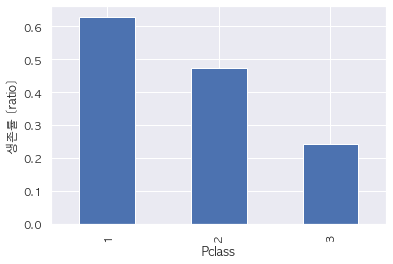

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


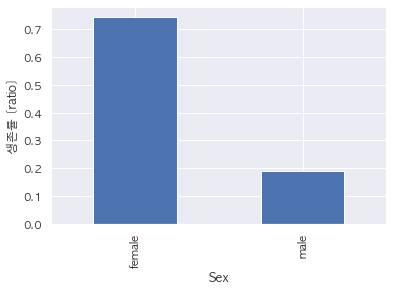

Agegroup
80    1.000000
0     0.612903
50    0.416667
10    0.401961
40    0.382022
30    0.363372
20    0.350000
60    0.315789
70    0.000000
Name: Survived, dtype: float64


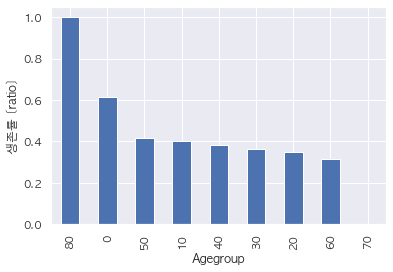

SibSp
1    0.535885
2    0.464286
0    0.345395
3    0.250000
4    0.166667
8    0.000000
5    0.000000
Name: Survived, dtype: float64


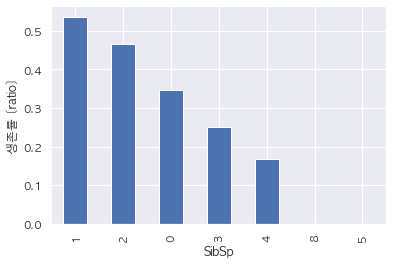

Parch
3    0.600000
1    0.550847
2    0.500000
0    0.343658
5    0.200000
6    0.000000
4    0.000000
Name: Survived, dtype: float64


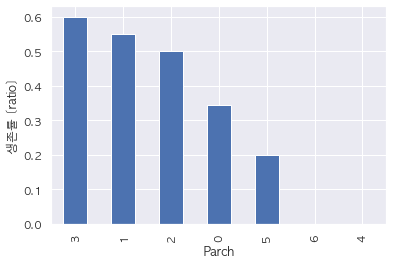

In [155]:
print('='*20+'ÏÑ§Î™ÖÎ≥ÄÏàò Í∑∏Î£πÏóê Îî∞Î•∏ ÏÉùÏ°¥Î•†'+'='*20)
for g in [surv_ratio_class, surv_ratio_gender, surv_ratio_age, surv_ratio_SibSp, surv_ratio_Parch]:
    print(g)
    g.plot.bar()
    plt.ylabel('ÏÉùÏ°¥Î•† [ratio]')
    plt.show()
    plt.close()
    print('='*40)

# 4-2. ÏÇ∞Ìè¨ÎèÑÏôÄ pearson ÏÉÅÍ¥ÄÍ≥ÑÏàò Î∂ÑÏÑùÏùÑ ÌÜµÌïú Ïó∞ÏÜçÌòï Î≥ÄÏàòÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í∞ÄÏÑ§ Í≤ÄÏ¶ù
## üìåÌï¥ÏÑù

### AgeÏôÄ ÏÉùÏ°¥Î•†Ïùò Í¥ÄÍ≥Ñ: 
- p-valueÍ∞Ä 0.89ÏúºÎ°ú H0 Ï±ÑÌÉù=>ÎÇòÏù¥ÏôÄ ÏÉùÏ°¥Î•†Ïùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏóÜÎã§.
    - ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.06, p-value: 0.89
    - Ïù¥Îü¨Ìïú Í≤∞Í≥ºÍ∞Ä ÎÇòÏò® Ïù¥Ïú†Î•º ÏÇ∞Ìè¨ÎèÑÎ•º Î≥¥Í≥† Ïïå Ïàò ÏûàÏóàÎã§.
        - ÎÇòÏù¥Í∞Ä 10Ïù¥ÌïòÎ°ú Ï†ÅÏúºÎ©¥ ÏÉùÏ°¥Î•†Ïù¥ ÎÜíÏïÑÏßÄÏßÄÎßå, ÎÇòÏù¥Í∞Ä 50Ïù¥ÏÉÅÏúºÎ°ú ÎßéÏúºÎ©¥ ÏÉùÏ°¥Î•†Ïù¥ ÎÇÆÏïÑÏßÑÎã§. 
        - 80ÎåÄ 100% ÏÉùÏ°¥Î•†ÏùÑ Î≥¥Ïù¥Îäî Îç∞Ïù¥ÌÑ∞Îäî Ïù¥ÏÉÅÏπòÏùº Í≤ÉÏúºÎ°ú ÏÉùÍ∞ÅÎêúÎã§.
            - Ïù¥ÏÉÅÏπòÎ•º Ï†úÍ±∞ÌïòÎ©¥ ÏÉÅÍ¥ÄÍ≥ÑÏàòÍ∞Ä Ïª§Ïßà Í≤ÉÏúºÎ°ú ÏòàÏÉÅÎêúÎã§.

### FareÏôÄ ÏÉùÏ°¥Î•†Ïùò Í¥ÄÍ≥Ñ:
- p-valueÍ∞Ä 0ÏúºÎ°ú H0 Í∏∞Í∞Å=>Ìã∞ÏºìÏöîÍ∏àÍ≥º ÏÉùÏ°¥Î•†ÏùÄ ÏñëÏùò ÏÉÅÍ¥Ä Í¥ÄÍ≥ÑÎ•º Í∞ÄÏßÑÎã§.
    - ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.29, p-value: 0

corr=0.05596479440169938, p-value=0.8862866108446309


/Users/dasol/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


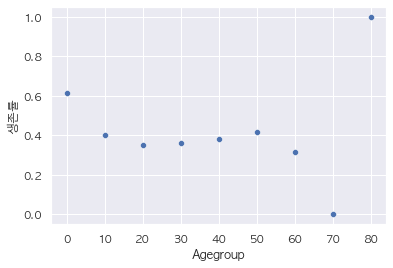

In [18]:
### ÎÇòÏù¥ÏôÄ ÏÉùÏ°¥Î•†
data = age_group.mean()[['Survived']]
sns.scatterplot(data.index.values.tolist(), y=data['Survived'].tolist())#, hue='Agegroup', style='Agegroup', data=data)
plt.xlabel('Agegroup')
plt.ylabel('ÏÉùÏ°¥Î•†')
corr, p = stats.pearsonr(data.index.values.tolist(),data['Survived'].tolist())
print('corr={}, p-value={}'.format(corr, p))

corr=0.2904323218401933, p-value=3.2989155352564168e-06


/Users/dasol/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


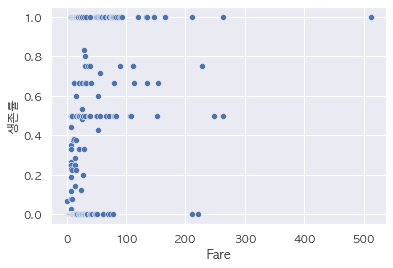

In [16]:
### FareÏôÄ ÏÉùÏ°¥Î•†
data = Fare_group.mean()[['Survived']]
sns.scatterplot(data.index.values.tolist(), y=data['Survived'].tolist())#, hue='Agegroup', style='Agegroup', data=data)
plt.xlabel('Fare')
plt.ylabel('ÏÉùÏ°¥Î•†')
corr, p = stats.pearsonr(data.index.values.tolist(),data['Survived'].tolist())
print('corr={}, p-value={}'.format(corr, p))

# 5. ÏÉùÏ°¥Ïóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî Ïû†Ïû¨ Ïù∏Ïûê

### Î≤îÏ£ºÌòï Î≥ÄÏàòÎäî ÏÑ§Î™ÖÎ≥ÄÏàò Í∑∏Î£πÏóê Îî∞Î•∏ ÏÉùÏ°¥Î•† ÌûàÏä§ÌÜ†Í∑∏Îû® Î∂ÑÏÑù,
### Ïó∞ÏÜçÌòï Î≥ÄÏàòÎäî ÏÇ∞Ìè¨ÎèÑÏôÄ pearson ÏÉÅÍ¥ÄÍ≥ÑÏàò Î∂ÑÏÑùÏùÑ ÏßÑÌñâÌïú Í≤∞Í≥º,

### üìåPclass, Age, SibSp, Parch, FareÍ∞Ä ÏÉùÏ°¥ Ïó¨Î∂Ä Î≥ÄÏàòÏóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî Ïû†Ïû¨ Ïù∏ÏûêÏù∏ Í≤ÉÏúºÎ°ú Ìï¥ÏÑùÌñàÏäµÎãàÎã§.